<a href="https://colab.research.google.com/github/Jassibro/CTR-PREDICTION/blob/main/Click_Through_Rates_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Click-Through Rates Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**The objective is to predict whether the audience will click on an ad or not and thus help the marketing team answer ad placement-related questions. CTR helps forecast ad success in online advertising, making it a crucial performance metric.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score,f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier


### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
df=pd.read_csv('/content/drive/MyDrive/data.csv')

### Dataset First View

In [4]:
# Dataset First Look
pd.set_option('display.max_columns',None)
df.head(10)

,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,month,dayofweek,day,hour,y
0,False,1005,1,856e6d3f,58a89a43,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,962c8333,be6db1d7,1,0,22683,320,50,2528,0,39,100075,221,10,1,28,14,0
1,True,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,5b1f94b9,1b13b020,1,0,17037,320,50,1934,2,39,-1,16,10,2,22,19,1
2,False,1005,0,e3c09f3a,d262cf1e,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,a9a84f4c,9a45a8e8,1,0,22155,320,50,2552,3,167,100202,23,10,3,23,18,0
3,False,1002,0,0da94452,248e439f,50e219e0,ecad2386,7801e8d9,07d7df22,0fa578fd,88c62dad,ea6abc60,0,0,21591,320,50,2478,3,167,100074,23,10,2,22,19,0
4,True,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,1e5e0d0e,36d749e5,1,0,15708,320,50,1722,0,35,-1,79,10,1,21,8,1
5,False,1005,1,d9750ee7,98572c79,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,7440e233,84ebbcd4,1,0,17614,320,50,1993,2,1063,100084,33,10,3,30,17,0
6,False,1005,0,83a0ad1a,5c9ae867,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,285aa37d,03683bd4,1,0,23369,320,50,2680,3,815,100156,42,10,3,30,7,0
7,False,1005,0,85f751fd,c4e18dd6,50e219e0,98fed791,d9b5648e,0f2161f8,a99f214a,140c5171,f51246a7,1,0,20984,320,50,2371,0,559,100217,46,10,3,30,10,0
8,False,1005,0,85f751fd,c4e18dd6,50e219e0,fc6dc16f,5c5a694b,0f2161f8,848ff98a,45867dad,b4d21d55,1,2,20392,320,50,2340,3,41,100111,159,10,5,25,15,0
9,False,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,ac116eec,5096d134,1,0,15705,320,50,1722,0,35,-1,79,10,4,24,16,0


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
print(f"There are total {df.shape[0]} rows and {df.shape[1]} columns")

There are total 99999 rows and 27 columns


### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   click             99999 non-null  bool  
 1   C1                99999 non-null  int64 
 2   banner_pos        99999 non-null  int64 
 3   site_id           99999 non-null  object
 4   site_domain       99999 non-null  object
 5   site_category     99999 non-null  object
 6   app_id            99999 non-null  object
 7   app_domain        99999 non-null  object
 8   app_category      99999 non-null  object
 9   device_id         99999 non-null  object
 10  device_ip         99999 non-null  object
 11  device_model      99999 non-null  object
 12  device_type       99999 non-null  int64 
 13  device_conn_type  99999 non-null  int64 
 14  C14               99999 non-null  int64 
 15  C15               99999 non-null  int64 
 16  C16               99999 non-null  int64 
 17  C17         

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
df[df.duplicated()].count()

click               658
C1                  658
banner_pos          658
site_id             658
site_domain         658
site_category       658
app_id              658
app_domain          658
app_category        658
device_id           658
device_ip           658
device_model        658
device_type         658
device_conn_type    658
C14                 658
C15                 658
C16                 658
C17                 658
C18                 658
C19                 658
C20                 658
C21                 658
month               658
dayofweek           658
day                 658
hour                658
y                   658
dtype: int64

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
df.isnull().sum()

click               0
C1                  0
banner_pos          0
site_id             0
site_domain         0
site_category       0
app_id              0
app_domain          0
app_category        0
device_id           0
device_ip           0
device_model        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
C20                 0
C21                 0
month               0
dayofweek           0
day                 0
hour                0
y                   0
dtype: int64

<Axes: >

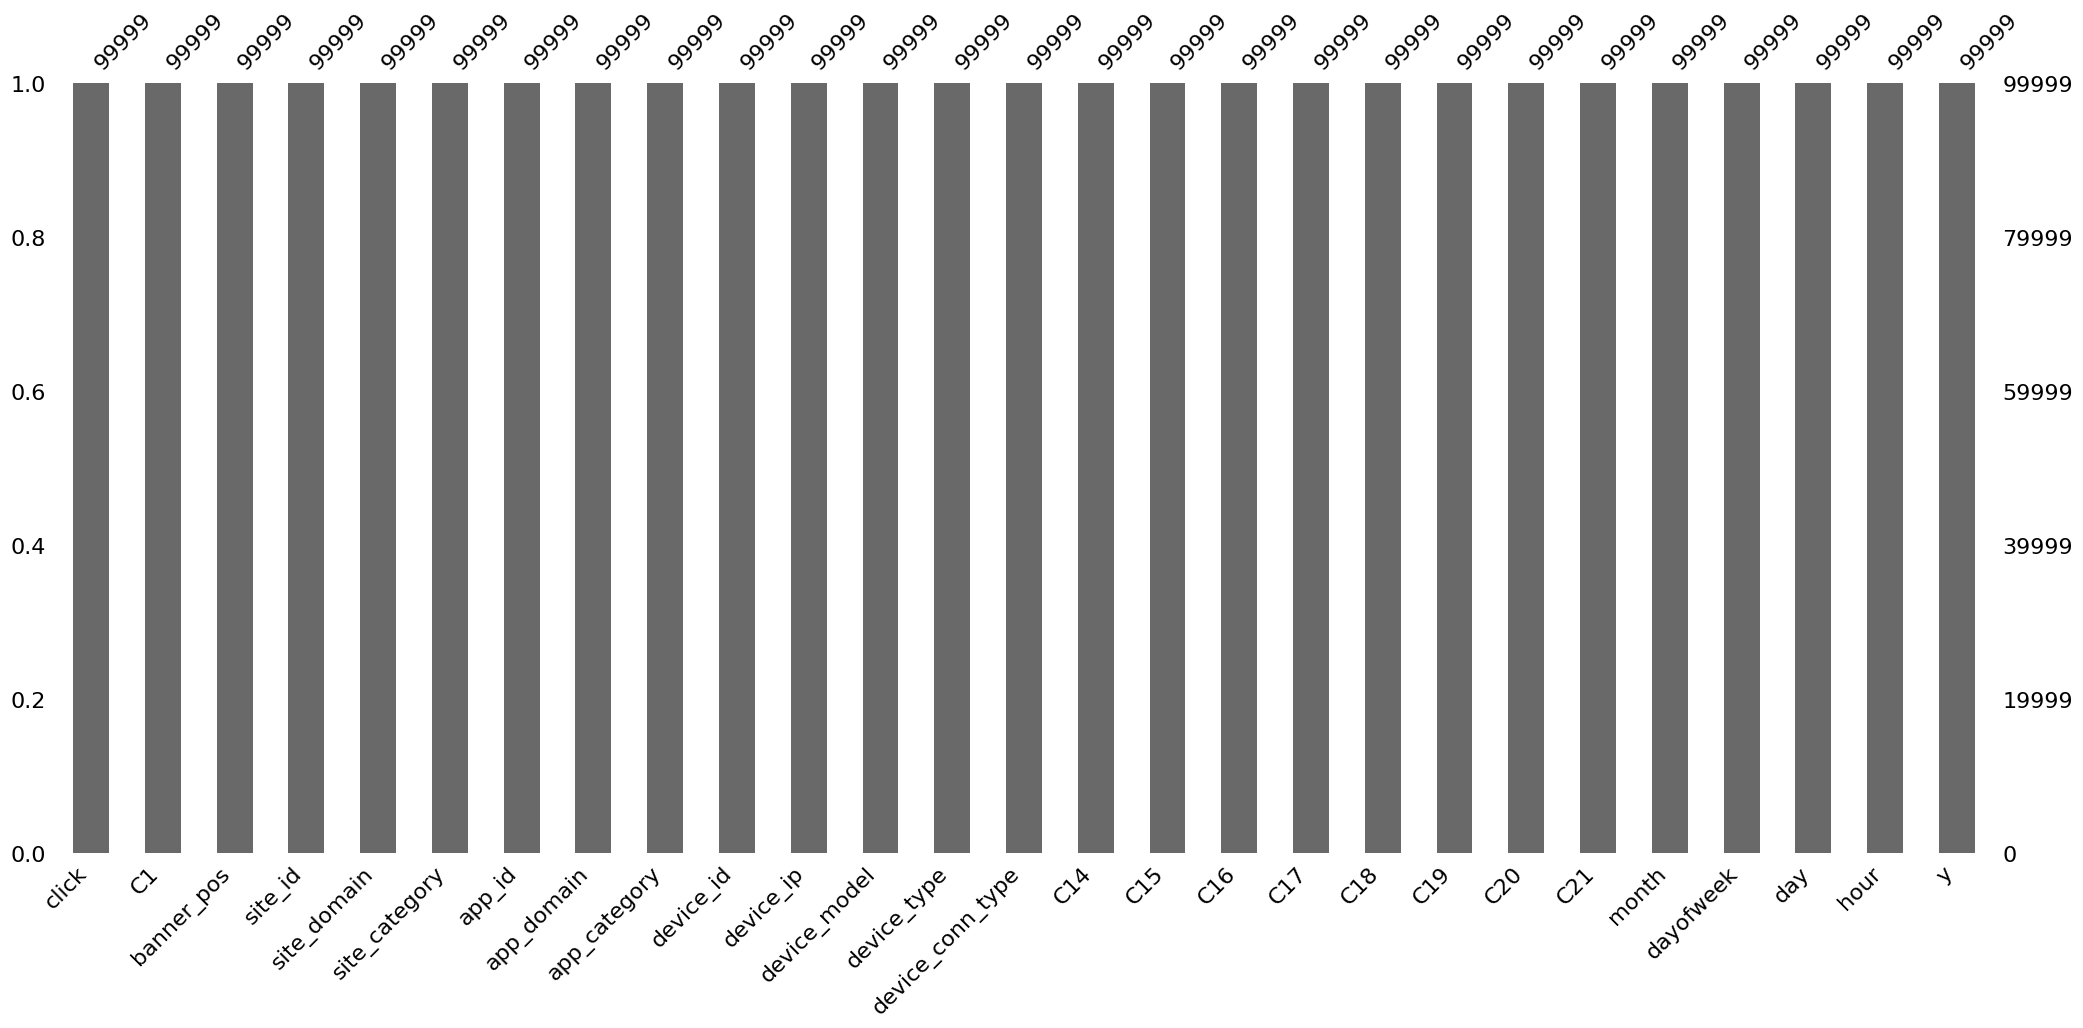

In [9]:
# Visualizing the missing values
msno.bar(df)

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
df.columns

Index(['click', 'C1', 'banner_pos', 'site_id', 'site_domain', 'site_category',
       'app_id', 'app_domain', 'app_category', 'device_id', 'device_ip',
       'device_model', 'device_type', 'device_conn_type', 'C14', 'C15', 'C16',
       'C17', 'C18', 'C19', 'C20', 'C21', 'month', 'dayofweek', 'day', 'hour',
       'y'],
      dtype='object')

In [11]:
# Dataset Describe
df.describe(include='all')

,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,month,dayofweek,day,hour,y
count,99999,99999.000000,99999.000000,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999.00000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.0,99999.000000,99999.000000,99999.000000,99999.000000
unique,2,NaN,NaN,1485,1331,19,1354,96,21,16801,78013,3145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,False,NaN,NaN,85f751fd,c4e18dd6,50e219e0,ecad2386,7801e8d9,07d7df22,a99f214a,6b9769f2,8a4875bd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,83019,NaN,NaN,36022,37362,40839,63977,67464,64769,82579,521,6041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1004.967550,0.289943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.01639,0.329453,18857.231732,318.834548,60.278743,2114.613036,1.439904,227.234932,53292.001950,83.163542,10.0,2.592836,25.485755,11.300673,0.169802
std,NaN,1.091916,0.505707,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.53110,0.854673,4944.919482,21.510752,47.713436,607.469442,1.326824,351.472366,49952.340367,70.161076,0.0,1.723003,2.968520,5.938725,0.375460
min,NaN,1001.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.000000,375.000000,120.000000,20.000000,112.000000,0.000000,33.000000,-1.000000,1.000000,10.0,0.000000,21.000000,0.000000,0.000000
25%,NaN,1005.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,0.000000,16920.000000,320.000000,50.000000,1863.000000,0.000000,35.000000,-1.000000,23.000000,10.0,1.000000,23.000000,7.000000,0.000000
50%,NaN,1005.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,0.000000,20346.000000,320.000000,50.000000,2323.000000,2.000000,39.000000,100050.000000,61.000000,10.0,2.000000,26.000000,11.000000,0.000000
75%,NaN,1005.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,0.000000,21893.000000,320.000000,50.000000,2526.000000,3.000000,171.000000,100093.000000,101.000000,10.0,4.000000,28.000000,16.000000,0.000000


### Variables Description

**click:** 0/1 for non-click/click

**hour:** format is YYMMDDHH, so 14091123 means 23:00 on Sept. 11, 2014 UTC.

**C1:** anonymized categorical variable

**banner_pos:** position of the ad/banner on the page

**site_id:**unique id of the site on which the ad is shown

**site_domain:**unique domain of the site on which the ad is shown

**site_category:**category of the site on which the ad is shown

**app_id:**app id of the site on which the ad is shown

**app_domain:**app category of the site on which the ad is shown

**app_category:**category id of the site on which the ad is shown

**device_id:**device id on which the add was shown

**device_ip:**ip address of the device on which the ad was shown

**device_model:**model type of the device on which the ad was shown

**device_type:**the device type on which the ad was shown

**device_conn_type:**the connection type of the device on which the ad was shown

**C14 - C21:**anonymized categorical variable

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
for i in df.columns:
  unique_count=df[i].nunique()
  print(f"There are {unique_count} unique values in {i}.\n")
  if unique_count<5:
    print(f"The unique values in {i} are {df[i].unique()}\n")

There are 2 unique values in click.

The unique values in click are [False  True]

There are 7 unique values in C1.

There are 7 unique values in banner_pos.

There are 1485 unique values in site_id.

There are 1331 unique values in site_domain.

There are 19 unique values in site_category.

There are 1354 unique values in app_id.

There are 96 unique values in app_domain.

There are 21 unique values in app_category.

There are 16801 unique values in device_id.

There are 78013 unique values in device_ip.

There are 3145 unique values in device_model.

There are 4 unique values in device_type.

The unique values in device_type are [1 0 4 5]

There are 4 unique values in device_conn_type.

The unique values in device_conn_type are [0 2 3 5]

There are 1722 unique values in C14.

There are 8 unique values in C15.

There are 9 unique values in C16.

There are 399 unique values in C17.

There are 4 unique values in C18.

The unique values in C18 are [0 2 3 1]

There are 64 unique values in

## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
# Write your code to make your dataset analysis ready.
df.drop_duplicates(inplace=True)

In [14]:
df.sample(5)

,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,month,dayofweek,day,hour,y
61219,False,1005,0,85f751fd,c4e18dd6,50e219e0,92f5800b,ae637522,0f2161f8,a99f214a,839738e0,e1eae715,1,3,21191,320,50,2424,1,161,100189,71,10,4,24,13,0
39971,False,1005,0,85f751fd,c4e18dd6,50e219e0,e96773f0,2347f47a,0f2161f8,a99f214a,e23c10b3,0f33af29,1,0,21975,320,50,2531,3,291,100094,61,10,3,23,4,0
4910,True,1005,0,7aec40a2,f415c8a8,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,5feab450,bd5d7d84,1,2,21766,300,250,2506,0,35,100148,157,10,2,22,9,1
99454,False,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,024b9075,ffc70ef9,1,0,15701,320,50,1722,0,35,100084,79,10,2,22,15,0
94646,True,1005,0,5b08c53b,7687a86e,3e814130,ecad2386,7801e8d9,07d7df22,a99f214a,7414dcc5,d787e91b,1,0,20093,300,250,2295,2,35,100075,23,10,3,30,4,1


In [15]:
# Count of values in click column
df['click'].value_counts()

False    82370
True     16971
Name: click, dtype: int64

In [16]:
#  Count of values in y column
df['y'].value_counts()

0    82370
1    16971
Name: y, dtype: int64

In [17]:
# Drop the 'click' column
df = df.drop(columns=['click','month'])

# Rename 'y' to 'click'
df = df.rename(columns={'y': 'click'})


In [18]:
df.head()

,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,dayofweek,day,hour,click
0,1005,1,856e6d3f,58a89a43,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,962c8333,be6db1d7,1,0,22683,320,50,2528,0,39,100075,221,1,28,14,0
1,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,5b1f94b9,1b13b020,1,0,17037,320,50,1934,2,39,-1,16,2,22,19,1
2,1005,0,e3c09f3a,d262cf1e,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,a9a84f4c,9a45a8e8,1,0,22155,320,50,2552,3,167,100202,23,3,23,18,0
3,1002,0,0da94452,248e439f,50e219e0,ecad2386,7801e8d9,07d7df22,0fa578fd,88c62dad,ea6abc60,0,0,21591,320,50,2478,3,167,100074,23,2,22,19,0
4,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,1e5e0d0e,36d749e5,1,0,15708,320,50,1722,0,35,-1,79,1,21,8,1


### What all manipulations have you done and insights you found?

In the dataset there are no Null/Missing values. There are 658 duplicated values, which are removed. The values in column name 'click' and 'y' are same i.e. in 'y' the values are just encoded version of column 'click' so i have removed the column click and renamed y to click for analysis purpose. Also i have dropped the 'month' column as it has only one value same for all.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1
Q1.What is the distribution of the 'click'(target variable)? How many clicks and non-clicks are there?

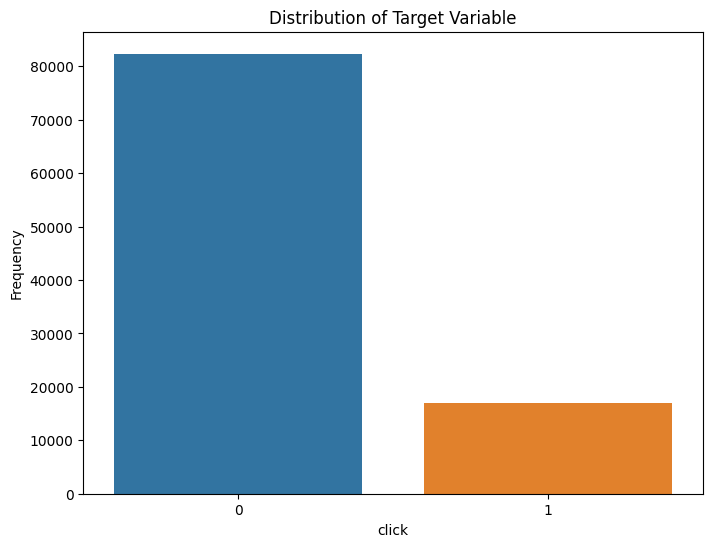

In [19]:
# Chart - 1 visualization code
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='click')
plt.title('Distribution of Target Variable')
plt.xlabel('click')
plt.ylabel('Frequency')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2
Q2.What is the distribution of the 'hour' variable? Are there any patterns or trends in ad clicks based on the hour of the day?

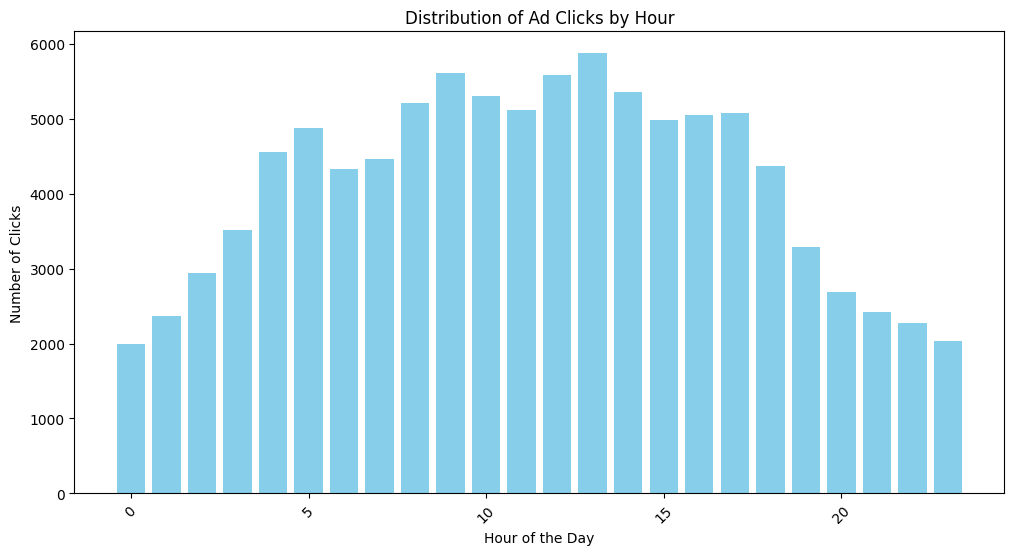

In [20]:
# Chart - 2 visualization code
# Extract the 'hour' and 'click' columns
hour_click_df = df[['hour', 'click']]

# Group the data by 'hour' and count the clicks
hour_click_counts = hour_click_df.groupby('hour')['click'].count().reset_index()

# Create a histogram or count plot
plt.figure(figsize=(12, 6))
plt.bar(hour_click_counts['hour'], hour_click_counts['click'], color='skyblue')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Clicks')
plt.title('Distribution of Ad Clicks by Hour')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3
Q3.What are the unique values and their frequencies in the 'C1' variable (anonymized categorical variable)?

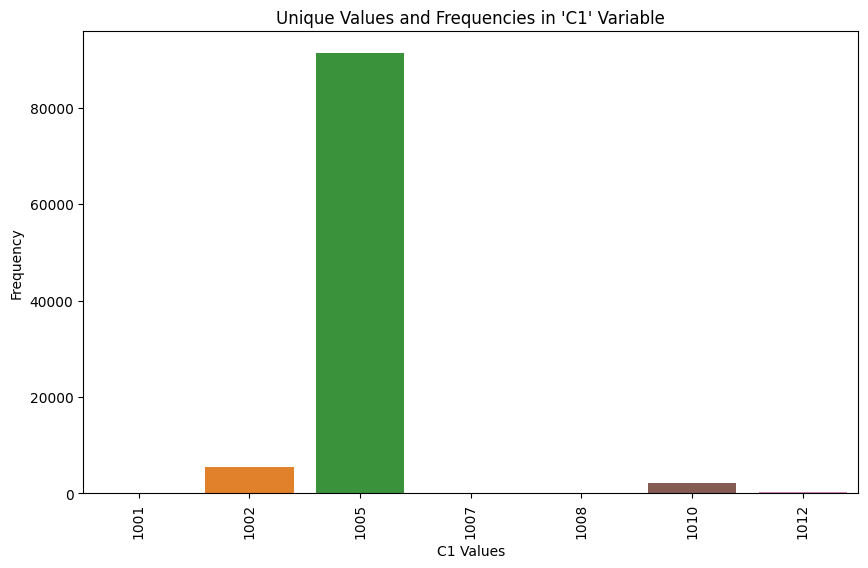

In [21]:
# Chart - 3 visualization code
# Calculate unique values and their frequencies
unique_values = df['C1'].value_counts()
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=unique_values.index, y=unique_values.values)
plt.title("Unique Values and Frequencies in 'C1' Variable")
plt.xlabel("C1 Values")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4
Q4.How are ads distributed in different banner positions ('banner_pos')? Are certain positions more popular for ad placements?

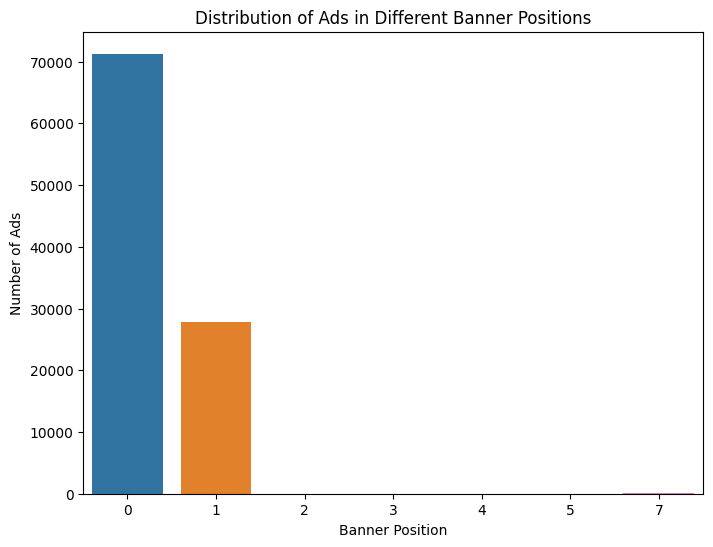

In [22]:
# Chart - 4 visualization code
# Extract the 'banner_pos' column
banner_pos_column = df['banner_pos']

# Calculate unique values and their frequencies
unique_values = banner_pos_column.value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=unique_values.index, y=unique_values.values)
plt.title("Distribution of Ads in Different Banner Positions")
plt.xlabel("Banner Position")
plt.ylabel("Number of Ads")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5
Q5.What is the distribution of site categories ('site_category')? Which categories have the highest number of ads?

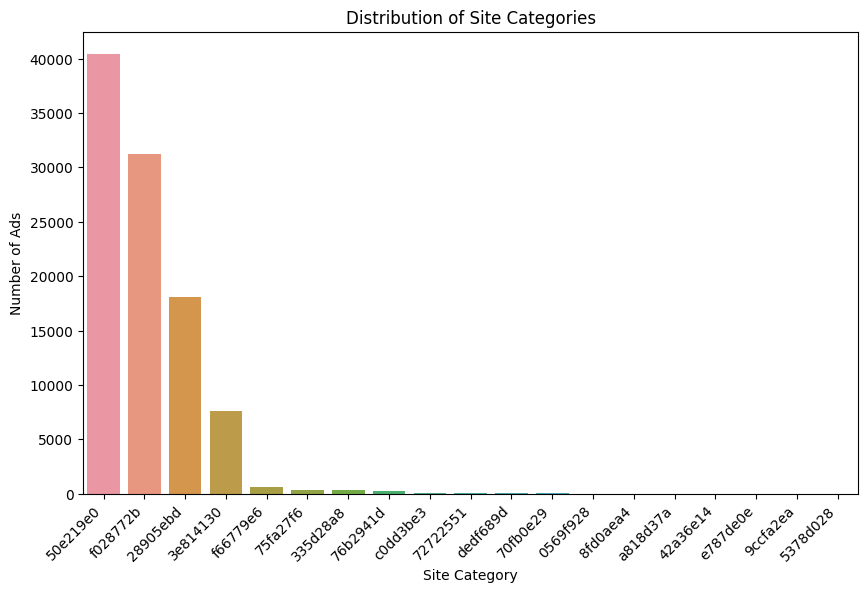

In [23]:
# Chart - 5 visualization code
# Calculate unique values and their frequencies
unique_values = df['site_category'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=unique_values.index, y=unique_values.values)
plt.title("Distribution of Site Categories")
plt.xlabel("Site Category")
plt.ylabel("Number of Ads")
plt.xticks(rotation=45, ha='right')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6
Q6.Is there any correlation between the 'click' variable and the 'device_type' variable? Does the type of device influence ad clicks?

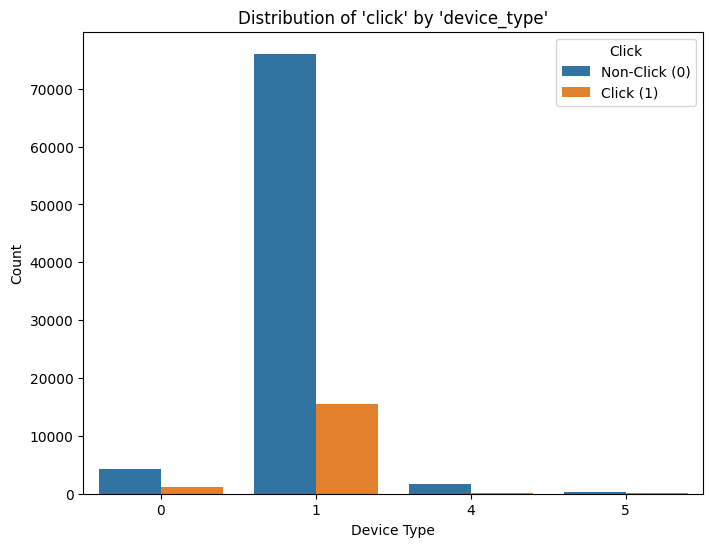

In [24]:
# Chart - 6 visualization code
# Calculate the correlation between 'click' and 'device_type'
correlation = df.groupby(['click', 'device_type']).count()
# Create a bar plot to visualize the distribution of 'click' by 'device_type'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='device_type', hue='click')
plt.title("Distribution of 'click' by 'device_type'")
plt.xlabel("Device Type")
plt.ylabel("Count")
plt.legend(title='Click', labels=['Non-Click (0)', 'Click (1)'])
plt.xticks(rotation=0)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7
Q7.How does the distribution of ad clicks vary across different 'device_type' and 'device_conn_type' combinations? Are certain combinations more likely to result in ad clicks?

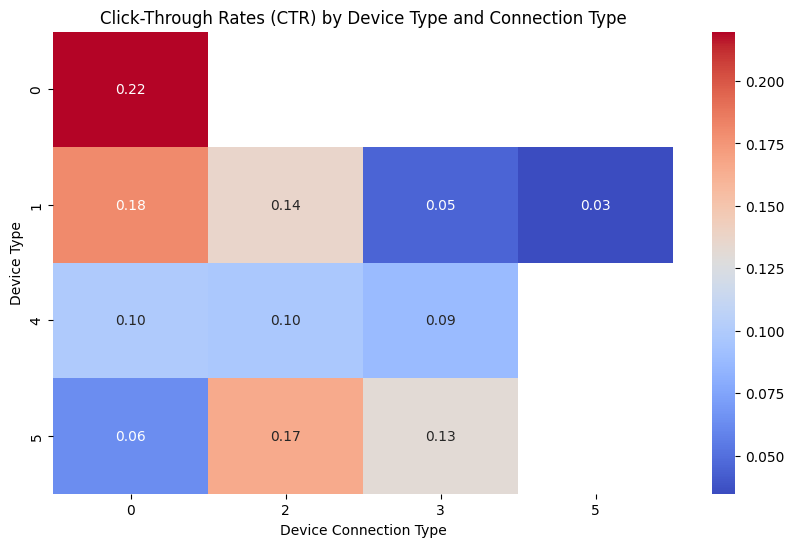

In [25]:
# Chart - 7 visualization code
# Create a pivot table to calculate CTR for each combination of 'device_type' and 'device_conn_type'
pivot_table = df.pivot_table(index='device_type', columns='device_conn_type', values='click', aggfunc='mean')

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Click-Through Rates (CTR) by Device Type and Connection Type")
plt.xlabel("Device Connection Type")
plt.ylabel("Device Type")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8
Q8.Can we identify a relationship between 'hour,' 'dayofweek,' and 'click'? Are there specific days of the week or hours of the day when ad clicks peak?

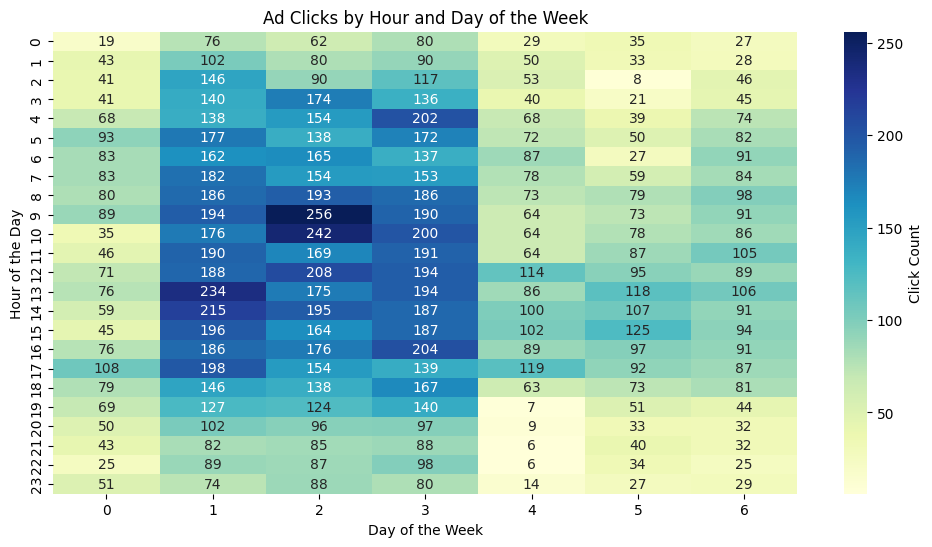

In [26]:
# Chart - 8 visualization code
# Create a pivot table to calculate the count of clicks for each hour and dayofweek
pivot_table = df.pivot_table(index='hour', columns='dayofweek', values='click', aggfunc='sum', fill_value=0)

# Create a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='d', cbar_kws={'label': 'Click Count'})
plt.title("Ad Clicks by Hour and Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Hour of the Day")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9 - Correlation Heatmap

<ipython-input-27-1e142d6c7e53>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


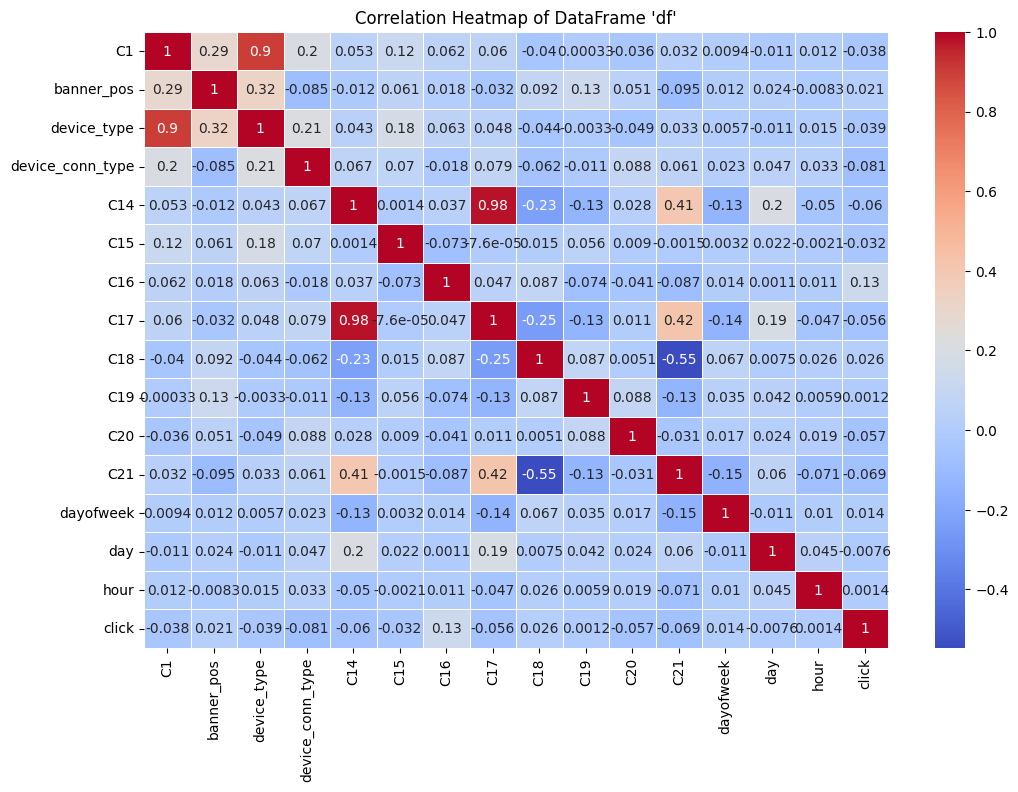

In [27]:
# Correlation Heatmap visualization code
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of DataFrame 'df'")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Hypothetical Statement 1: The click-through rate is significantly higher during specific hours of the day compared to others. We hypothesize that there is a significant difference in click-through rates between different hours.

Hypothetical Statement 2: The banner position significantly affects the click-through rate. We hypothesize that certain banner positions have a higher click-through rate compared to others.

Hypothetical Statement 3: There is a significant association between the device type and the click-through rate. We hypothesize that different device types result in significantly different click-through rates.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): The click-through rate is the same across all hours.

Alternative Hypothesis (H1): The click-through rate is different for at least one hour.

#### 2. Perform an appropriate statistical test.

In [28]:
# Perform Statistical Test to obtain P-Value
import scipy.stats as stats

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(*[df[df['hour'] == hour]['click'] for hour in df['hour'].unique()])

# Check the p-value
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in click-through rates between hours.")
else:
    print("Fail to reject the null hypothesis: Click-through rates are similar across hours.")


Fail to reject the null hypothesis: Click-through rates are similar across hours.


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): The banner position does not affect the click-through rate.

Alternative Hypothesis (H1): The banner position significantly affects the click-through rate.

#### 2. Perform an appropriate statistical test.

In [29]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['banner_pos'], df['click'])
chi2, p, _, _ = chi2_contingency(contingency_table)

# Check the p-value
if p < 0.05:
    print("Reject the null hypothesis: The banner position significantly affects the click-through rate.")
else:
    print("Fail to reject the null hypothesis: Banner position does not significantly affect the click-through rate.")

Reject the null hypothesis: The banner position significantly affects the click-through rate.


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no association between device type and click-through rate.

Alternative Hypothesis (H1): There is a significant association between device type and click-through rate.

#### 2. Perform an appropriate statistical test.

In [30]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['device_type'], df['click'])
chi2, p, _, _ = chi2_contingency(contingency_table)

# Check the p-value
if p < 0.05:
    print("Reject the null hypothesis: There is a significant association between device type and click-through rate.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between device type and click-through rate.")

Reject the null hypothesis: There is a significant association between device type and click-through rate.


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [31]:
# Handling Missing Values & Missing Value Imputation
df.isna().any()

C1                  False
banner_pos          False
site_id             False
site_domain         False
site_category       False
app_id              False
app_domain          False
app_category        False
device_id           False
device_ip           False
device_model        False
device_type         False
device_conn_type    False
C14                 False
C15                 False
C16                 False
C17                 False
C18                 False
C19                 False
C20                 False
C21                 False
dayofweek           False
day                 False
hour                False
click               False
dtype: bool

#### What all missing value imputation techniques have you used and why did you use those techniques?

There are no missing values in the data.

In [32]:
df.describe(include='all')

,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,dayofweek,day,hour,click
count,99341.000000,99341.000000,99341,99341,99341,99341,99341,99341,99341,99341,99341,99341.000000,99341.000000,99341.000000,99341.000000,99341.000000,99341.000000,99341.000000,99341.000000,99341.000000,99341.000000,99341.000000,99341.000000,99341.000000,99341.000000
unique,NaN,NaN,1485,1331,19,1354,96,21,16801,78013,3145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,85f751fd,c4e18dd6,50e219e0,ecad2386,7801e8d9,07d7df22,a99f214a,6b9769f2,8a4875bd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,35630,36970,40442,63711,67194,64502,81940,518,6032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1004.967264,0.290213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.016458,0.329220,18846.561903,318.828882,60.338913,2113.226392,1.436627,226.056694,53294.197975,82.952185,2.593169,25.483828,11.310365,0.170836
std,1.094744,0.506145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.532553,0.855082,4942.636368,21.578787,47.848698,607.163618,1.325966,350.392948,49952.107818,70.049904,1.725398,2.965049,5.940158,0.376367
min,1001.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,375.000000,120.000000,20.000000,112.000000,0.000000,33.000000,-1.000000,1.000000,0.000000,21.000000,0.000000,0.000000
25%,1005.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,16920.000000,320.000000,50.000000,1863.000000,0.000000,35.000000,-1.000000,23.000000,1.000000,23.000000,7.000000,0.000000
50%,1005.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,20346.000000,320.000000,50.000000,2323.000000,2.000000,39.000000,100050.000000,61.000000,2.000000,26.000000,11.000000,0.000000
75%,1005.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,21893.000000,320.000000,50.000000,2526.000000,3.000000,171.000000,100084.000000,100.000000,4.000000,28.000000,16.000000,0.000000


### 2. Handling Outliers

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99341 entries, 0 to 99998
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   C1                99341 non-null  int64 
 1   banner_pos        99341 non-null  int64 
 2   site_id           99341 non-null  object
 3   site_domain       99341 non-null  object
 4   site_category     99341 non-null  object
 5   app_id            99341 non-null  object
 6   app_domain        99341 non-null  object
 7   app_category      99341 non-null  object
 8   device_id         99341 non-null  object
 9   device_ip         99341 non-null  object
 10  device_model      99341 non-null  object
 11  device_type       99341 non-null  int64 
 12  device_conn_type  99341 non-null  int64 
 13  C14               99341 non-null  int64 
 14  C15               99341 non-null  int64 
 15  C16               99341 non-null  int64 
 16  C17               99341 non-null  int64 
 17  C18         

In [34]:
df.head(15)

,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,dayofweek,day,hour,click
0,1005,1,856e6d3f,58a89a43,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,962c8333,be6db1d7,1,0,22683,320,50,2528,0,39,100075,221,1,28,14,0
1,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,5b1f94b9,1b13b020,1,0,17037,320,50,1934,2,39,-1,16,2,22,19,1
2,1005,0,e3c09f3a,d262cf1e,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,a9a84f4c,9a45a8e8,1,0,22155,320,50,2552,3,167,100202,23,3,23,18,0
3,1002,0,0da94452,248e439f,50e219e0,ecad2386,7801e8d9,07d7df22,0fa578fd,88c62dad,ea6abc60,0,0,21591,320,50,2478,3,167,100074,23,2,22,19,0
4,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,1e5e0d0e,36d749e5,1,0,15708,320,50,1722,0,35,-1,79,1,21,8,1
5,1005,1,d9750ee7,98572c79,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,7440e233,84ebbcd4,1,0,17614,320,50,1993,2,1063,100084,33,3,30,17,0
6,1005,0,83a0ad1a,5c9ae867,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,285aa37d,03683bd4,1,0,23369,320,50,2680,3,815,100156,42,3,30,7,0
7,1005,0,85f751fd,c4e18dd6,50e219e0,98fed791,d9b5648e,0f2161f8,a99f214a,140c5171,f51246a7,1,0,20984,320,50,2371,0,559,100217,46,3,30,10,0
8,1005,0,85f751fd,c4e18dd6,50e219e0,fc6dc16f,5c5a694b,0f2161f8,848ff98a,45867dad,b4d21d55,1,2,20392,320,50,2340,3,41,100111,159,5,25,15,0
9,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,ac116eec,5096d134,1,0,15705,320,50,1722,0,35,-1,79,4,24,16,0


In [35]:
# Handling Outliers & Outlier treatments
lower_percentile = 5
upper_percentile = 95

# Select only the numerical columns from your DataFrame
numeric_columns = df.select_dtypes(include=[np.number])

# Apply Winsorization to the numerical columns
df_winsorized = numeric_columns.apply(lambda column: np.where(column < np.percentile(column, lower_percentile), np.percentile(column, lower_percentile), np.where(column > np.percentile(column, upper_percentile), np.percentile(column, upper_percentile), column)))

# Update the original DataFrame with the Winsorized values for numerical columns
df[numeric_columns.columns] = df_winsorized

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [36]:
# Encode your categorical columns
# Specify the categorical columns to be one-hot encoded
categorical_columns = ['C1','banner_pos','device_type', 'device_conn_type']

# Use pd.get_dummies to one-hot encode the categorical columns
df= pd.get_dummies(df, columns=categorical_columns)


#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [37]:
# Manipulate Features to minimize feature correlation and create new features
df['hourly_click_rate'] = df.groupby('hour')['click'].transform('mean')

In [38]:
df['dayofweek_click_rate'] = df.groupby('dayofweek')['click'].transform('mean')

In [39]:
df['site_app_category'] = df['site_category'] + '_' + df['app_category']

# # Calculate the mean CTR for each unique combination
df['mean_ctr_site_app_category'] = df.groupby('site_app_category')['click'].transform('mean')



In [40]:
df['site_details']=df['site_id'] + '-' + df['site_domain'] + ' ' + df['site_category']
df['site_ctr']=df.groupby('site_details')['click'].transform('mean')

In [41]:
df['app_details']=df['app_id'] + ' ' + df['app_domain'] + ' ' + df['app_category']
df['app_ctr']= df.groupby('app_details')['click'].transform('mean')

In [42]:
df['device_details']=df['device_id'] + ' ' + df['device_model']
df['device_ctr']=df.groupby('device_details')['click'].transform('mean')

In [43]:
df.columns

Index(['site_id', 'site_domain', 'site_category', 'app_id', 'app_domain',
       'app_category', 'device_id', 'device_ip', 'device_model', 'C14', 'C15',
       'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'dayofweek', 'day', 'hour',
       'click', 'C1_1002.0', 'C1_1005.0', 'banner_pos_0.0', 'banner_pos_1.0',
       'device_type_0.0', 'device_type_1.0', 'device_conn_type_0.0',
       'device_conn_type_2.0', 'device_conn_type_3.0', 'hourly_click_rate',
       'dayofweek_click_rate', 'site_app_category',
       'mean_ctr_site_app_category', 'site_details', 'site_ctr', 'app_details',
       'app_ctr', 'device_details', 'device_ctr'],
      dtype='object')

#### 2. Feature Selection

In [44]:
final_df=df.drop(columns=['site_id', 'site_domain', 'site_category', 'app_id', 'app_domain',
       'app_category', 'device_id', 'device_ip', 'device_model','site_app_category','site_details','app_details','device_details']).copy()

In [45]:
target_variable='click'
features=final_df.drop('click',axis=1)

### 6. Data Scaling

In [46]:
# Scaling your data
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

# Standardize the features (Z-score scaling)
standardized_features = standard_scaler.fit_transform(features)
standardized_features_df = pd.DataFrame(standardized_features, columns=features.columns)
standardized_features_df

,C14,C15,C16,C17,C18,C19,C20,C21,dayofweek,day,hour,C1_1002.0,C1_1005.0,banner_pos_0.0,banner_pos_1.0,device_type_0.0,device_type_1.0,device_conn_type_0.0,device_conn_type_2.0,device_conn_type_3.0,hourly_click_rate,dayofweek_click_rate,mean_ctr_site_app_category,site_ctr,app_ctr,device_ctr
0,0.829526,0.267893,-0.230216,0.707103,-1.083462,-0.564555,0.936536,1.994786,-0.923368,0.848615,0.470726,-0.242327,0.242327,-1.593953,1.593953,-0.241838,0.241838,0.396043,-0.294576,-0.242955,1.101783,-0.971519,0.118921,-1.174467,0.333175,0.045135
1,-0.437169,0.267893,-0.230216,-0.328234,0.424879,-0.564555,-1.066931,-0.867757,-0.343789,-1.174971,1.345788,-0.242327,0.242327,-1.593953,1.593953,-0.241838,0.241838,0.396043,-0.294576,-0.242955,0.038269,-1.160364,0.118921,1.081939,0.333175,0.708511
2,0.711068,0.267893,-0.230216,0.748935,1.179050,-0.146882,0.938858,-0.867757,0.235791,-0.837706,1.170776,-0.242327,0.242327,0.627371,-0.627371,-0.241838,0.241838,0.396043,-0.294576,-0.242955,-0.014527,1.096638,0.610534,-1.018899,0.333175,-0.460883
3,0.584533,0.267893,-0.230216,0.619953,1.179050,-0.146882,0.936516,-0.867757,-0.343789,-1.174971,1.345788,4.126648,-4.126648,0.627371,-0.627371,4.134997,-4.134997,0.396043,-0.294576,-0.242955,0.038269,-1.160364,0.810415,-1.467916,0.333175,-0.985094
4,-0.735334,0.267893,-0.230216,-0.697748,-1.083462,-0.577608,-1.066931,-0.058149,-0.923368,-1.512235,-0.579348,-0.242327,0.242327,0.627371,-0.627371,-0.241838,0.241838,0.396043,-0.294576,-0.242955,0.138049,-0.971519,0.610534,0.276735,0.333175,0.326768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99336,-0.391850,0.267893,-0.230216,-0.260257,1.179050,-0.564555,0.937997,-0.867757,0.235791,-0.837706,0.645739,-0.242327,0.242327,0.627371,-0.627371,-0.241838,0.241838,0.396043,-0.294576,-0.242955,1.918732,1.096638,1.971627,-0.007743,0.333175,0.291734
99337,0.734849,0.267893,-0.230216,0.736734,-1.083462,-0.146882,0.936716,1.994786,-0.343789,1.185879,-1.629422,-0.242327,0.242327,0.627371,-0.627371,-0.241838,0.241838,0.396043,-0.294576,-0.242955,0.169104,-1.160364,0.610534,0.276735,0.333175,0.209396
99338,0.513862,0.267893,-0.230216,0.558949,0.424879,-0.564555,-1.066931,-0.867757,-0.343789,-1.174971,0.645739,-0.242327,0.242327,0.627371,-0.627371,-0.241838,0.241838,0.396043,-0.294576,-0.242955,1.918732,-1.160364,-1.251692,-0.416697,0.340512,4.781226
99339,0.248453,-3.732828,4.343754,0.300986,0.424879,-0.577608,0.936656,-0.867757,1.394950,-0.163178,-0.579348,-0.242327,0.242327,0.627371,-0.627371,-0.241838,0.241838,0.396043,-0.294576,-0.242955,0.138049,0.815350,1.971627,2.466609,0.333175,0.381849


##### Which method have you used to scale you data and why?

### 8. Data Splitting

In [47]:
X=standardized_features_df
Y=df[[target_variable]]

In [48]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42,stratify=Y)

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

In [49]:
Y_train.value_counts()

click
0.0      61777
1.0      12728
dtype: int64

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [50]:
# Handling Imbalanced Dataset (If needed)
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data only
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

In [51]:
Y_train_resampled.value_counts()

click
0.0      61777
1.0      61777
dtype: int64

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [52]:
# ML Model - 1 Implementation
# Create a Logistic Regression model
logistic_regression_model = LogisticRegression(max_iter=1000 ,random_state=42)

# Fit the model on the training data
logistic_regression_model.fit(X_train_resampled, np.ravel(Y_train_resampled))

# Predict on the testing data
Y_pred = logistic_regression_model.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [53]:
# Print Classification Report
print("Classification Report:")
print(classification_report(Y_test, Y_pred))

# Print Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))

# Calculate and print ROC AUC Score
roc_auc = roc_auc_score(Y_test, Y_pred)
print("ROC AUC Score:", roc_auc)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.72      0.81     20593
         1.0       0.36      0.77      0.49      4243

    accuracy                           0.73     24836
   macro avg       0.65      0.74      0.65     24836
weighted avg       0.84      0.73      0.76     24836

Confusion Matrix:
[[14785  5808]
 [  984  3259]]
ROC AUC Score: 0.7430255154787809


#### 2. Cross- Validation & Hyperparameter Tuning

In [54]:
# Create and fit the Logistic Regression model with cross-validation
logistic_regression_model = LogisticRegressionCV(Cs=10,cv=5,max_iter=1000,random_state=42,scoring='accuracy')

logistic_regression_model.fit(X_train_resampled,np.ravel(Y_train_resampled))

# Make predictions on the test set
Y_pred_lr_cv = logistic_regression_model.predict(X_test)

In [55]:
# Print Classification Report
print("Classification Report:")
print(classification_report(Y_test, Y_pred_lr_cv))

# Print Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred_lr_cv))

# Calculate and print ROC AUC Score
roc_auc = roc_auc_score(Y_test, Y_pred_lr_cv)
print("ROC AUC Score:", roc_auc)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.72      0.81     20593
         1.0       0.36      0.77      0.49      4243

    accuracy                           0.73     24836
   macro avg       0.65      0.74      0.65     24836
weighted avg       0.84      0.73      0.76     24836

Confusion Matrix:
[[14796  5797]
 [  984  3259]]
ROC AUC Score: 0.7432925965257386


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [56]:
# Create a Decision Tree classifier
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
decision_tree_model.fit(X_train_resampled, Y_train_resampled)

# Predict on the testing data
Y_pred_decision_tree = decision_tree_model.predict(X_test)

In [57]:
# Print Classification Report
print("Classification Report:")
print(classification_report(Y_test, Y_pred_decision_tree))

# Print Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred_decision_tree))

# Calculate and print ROC AUC Score
roc_auc = roc_auc_score(Y_test, Y_pred_decision_tree)
print("ROC AUC Score:", roc_auc)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.85      0.87     20593
         1.0       0.38      0.45      0.42      4243

    accuracy                           0.78     24836
   macro avg       0.63      0.65      0.64     24836
weighted avg       0.80      0.78      0.79     24836

Confusion Matrix:
[[17525  3068]
 [ 2323  1920]]
ROC AUC Score: 0.651763676242859


#### 2. Cross- Validation & Hyperparameter Tuning

In [58]:
# # ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
#  Create a Decision Tree classifier
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Define hyperparameters and their possible values
param_grid = {'max_depth': [None, 10, 20],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]}

# Create a grid search with cross-validation
grid_search = GridSearchCV(estimator=decision_tree_model,param_grid=param_grid,cv=5,scoring='accuracy')

# Fit the grid search to your subsampled data
grid_search.fit(X_train_resampled, np.ravel(Y_train_resampled))

# Get the best hyperparameter values
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Predict using the best model
Y_pred_best = best_model.predict(X_test)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [59]:
# Print Classification Report
print("Classification Report:")
print(classification_report(Y_test, Y_pred_best))

# Print Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred_best))

# Calculate and print ROC AUC Score
roc_auc = roc_auc_score(Y_test, Y_pred_best)
print("ROC AUC Score:", roc_auc)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.85      0.87     20593
         1.0       0.38      0.45      0.42      4243

    accuracy                           0.78     24836
   macro avg       0.63      0.65      0.64     24836
weighted avg       0.80      0.78      0.79     24836

Confusion Matrix:
[[17525  3068]
 [ 2323  1920]]
ROC AUC Score: 0.651763676242859


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [60]:
# Create a RandomForestClassifier model
random_forest_model = RandomForestClassifier(random_state=42)

# Fit the model to your training data
random_forest_model.fit(X_train_resampled,np.ravel(Y_train_resampled))

# Make predictions on the test data
Y_pred_random_forest = random_forest_model.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [61]:
# Print Classification Report
print("Classification Report:")
print(classification_report(Y_test, Y_pred_random_forest))

# Print Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred_random_forest))

# Calculate and print ROC AUC Score
roc_auc = roc_auc_score(Y_test, Y_pred_random_forest)
print("ROC AUC Score:", roc_auc)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89     20593
         1.0       0.47      0.42      0.45      4243

    accuracy                           0.82     24836
   macro avg       0.68      0.66      0.67     24836
weighted avg       0.81      0.82      0.82     24836

Confusion Matrix:
[[18563  2030]
 [ 2447  1796]]
ROC AUC Score: 0.6623541124215215


#### 2. Cross- Validation & Hyperparameter Tuning

In [62]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Create a Random Forest classifier
random_forest_model = RandomForestClassifier(random_state=42)

# Define hyperparameters and their possible values
param_dist = {'n_estimators': [50, 80, 100],'max_depth': [3, 5, 7]}

# Create a randomized search with cross-validation
random_search = RandomizedSearchCV(estimator=random_forest_model,param_distributions=param_dist,n_iter=5,scoring='accuracy',cv=5,random_state=42)

# Fit the randomized search to your subsampled data
random_search.fit(X_train_resampled, np.ravel(Y_train_resampled))

# Get the best hyperparameter values
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = random_search.best_estimator_

# Predict using the best model
Y_pred_best_RF = best_model.predict(X_test)

Best Hyperparameters: {'n_estimators': 80, 'max_depth': 7}


In [63]:
# Visualizing evaluation Metric Score chart
# Print Classification Report
print("Classification Report:")
print(classification_report(Y_test, Y_pred_best_RF))

# Print Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred_best_RF))

# Calculate and print ROC AUC Score
roc_auc = roc_auc_score(Y_test, Y_pred_best_RF)
print("ROC AUC Score:", roc_auc)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.69      0.80     20593
         1.0       0.34      0.79      0.48      4243

    accuracy                           0.71     24836
   macro avg       0.64      0.74      0.64     24836
weighted avg       0.84      0.71      0.74     24836

Confusion Matrix:
[[14220  6373]
 [  889  3354]]
ROC AUC Score: 0.7405021709655406


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

## ML Model - 4

In [64]:
import xgboost as xgb

# Create an XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# Fit the model to the training data
xgb_model.fit(X_train_resampled, np.ravel(Y_train_resampled))

# Predict on the testing data
Y_pred_xgb = xgb_model.predict(X_test)


## 1.Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [65]:
# Visualizing evaluation Metric Score chart
# Print Classification Report
print("Classification Report:")
print(classification_report(Y_test, Y_pred_xgb))

# Print Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred_xgb))

# Calculate and print ROC AUC Score
roc_auc = roc_auc_score(Y_test, Y_pred_xgb)
print("ROC AUC Score:", roc_auc)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91     20593
         1.0       0.57      0.39      0.46      4243

    accuracy                           0.84     24836
   macro avg       0.72      0.66      0.68     24836
weighted avg       0.83      0.84      0.83     24836

Confusion Matrix:
[[19335  1258]
 [ 2598  1645]]
ROC AUC Score: 0.6633043322293435


## 2. Cross- Validation & Hyperparameter Tuning

In [66]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Create an XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# Define a random grid of hyperparameters to search
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
    'gamma': [0, 1, 2],
    'min_child_weight': [1, 2, 3],
    'scale_pos_weight': [1, 2, 3]
}

# Create a RandomizedSearchCV object with cross-validation
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)

# Fit the model to the training data with hyperparameter tuning
random_search.fit(X_train_resampled, np.ravel(Y_train_resampled))

# Get the best hyperparameters
best_params = random_search.best_params_

# Create an XGBoost model with the best hyperparameters
best_xgb_model = xgb.XGBClassifier(random_state=42, **best_params)

# Fit the best model to the training data
best_xgb_model.fit(X_train_resampled, np.ravel(Y_train_resampled))

# Predict on the testing data using the best model
Y_pred_xgb_cv = best_xgb_model.predict(X_test)

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params)

Best Hyperparameters:
{'subsample': 0.6, 'scale_pos_weight': 1, 'n_estimators': 100, 'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.3, 'gamma': 0, 'colsample_bytree': 0.8}


In [70]:
# Visualizing evaluation Metric Score chart
# Print Classification Report
print("Classification Report:")
print(classification_report(Y_test, Y_pred_xgb_cv))

# Print Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred_xgb_cv))

# Calculate and print ROC AUC Score
roc_auc = roc_auc_score(Y_test, Y_pred_xgb_cv)
print("ROC AUC Score:", roc_auc)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.93      0.91     20593
         1.0       0.54      0.41      0.47      4243

    accuracy                           0.84     24836
   macro avg       0.71      0.67      0.69     24836
weighted avg       0.83      0.84      0.83     24836

Confusion Matrix:
[[19089  1504]
 [ 2486  1757]]
ROC AUC Score: 0.67052963763008


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***